# Natural Language Processing

In [ ]:
#!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from nltk import Text
from nltk.draw.dispersion import dispersion_plot
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
import nltk
nltk.download()

*Viewing data from TMDB_scraped_actors*

In [ ]:
with open('../code/TMDB_scraped_actors.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    tmdb_data = list(reader)

for i in range(1, len(tmdb_data)):
    print(tmdb_data[i][1], tmdb_data[i][2])

C:\Users\clara\AppData\Local\Temp\ipykernel_13772\3085492917.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette='pastel')


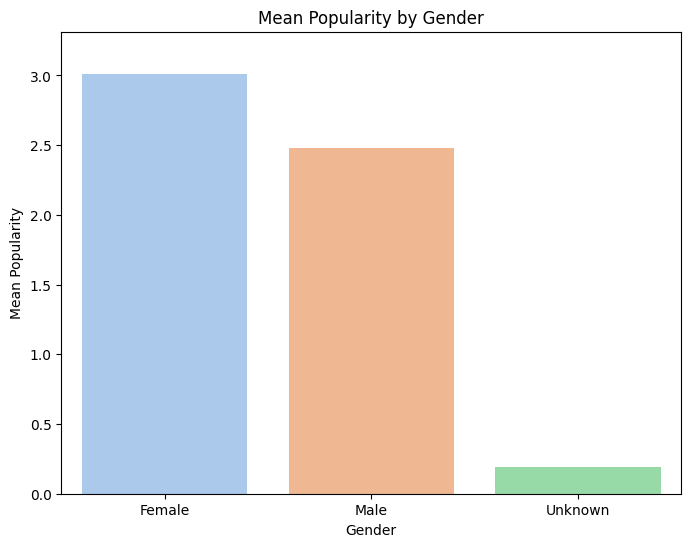

In [45]:
file_path = '../code/TMDB_scraped_actors.csv'

with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    data = list(reader)

headers = data[0]
rows = data[1:]

df = pd.DataFrame(rows, columns=headers)

df['actor_popularity'] = pd.to_numeric(df['actor_popularity'], errors='coerce') 
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')

gender_mapping = {1: 'Female', 2: 'Male'}
df['gender_label'] = df['gender'].map(gender_mapping).fillna('Unknown')

# Calculate mean popularity by gender
mean_popularity = df.groupby('gender_label')['actor_popularity'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette='pastel')
plt.title('Mean Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Popularity')
plt.ylim(0, mean_popularity.max() * 1.1)
plt.show()


*When specific words is appears in wiki scraped pages*

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

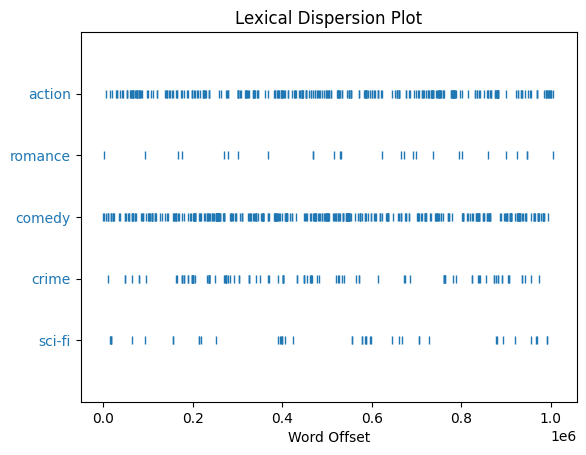

In [48]:
file_path = '../code/WIKI_scraped_pages_10000.csv'

with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    page_content = [row['page_content'] for row in reader if 'page_content' in row and row['page_content']]

# Combine all page contents into one string
combined_text = " ".join(page_content)

# Tokenize the combined text
tokens = word_tokenize(combined_text.lower())

nltk_text = Text(tokens)

# Words to plot
target_words = ["action", "romance", "comedy", "crime", "sci-fi"]

missing_words = [word for word in target_words if word not in tokens]
if missing_words:
    print(f"The following words are missing and won't appear in the plot: {missing_words}")

# Generate Lexical Dispersion Plot
dispersion_plot(nltk_text, target_words)


*Create a graph showing how many men and woman in a movie*

In [ ]:
targets = ['men', 'women', 'people']

cfd = nltk.ConditionalFreqDist(
    (w.lower(), fileid[:4]) 
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    if w.lower() in targets)
     
cfd.plot()

plt.show()

*Could be nice making a boxplot over genres and their rating*

https://www.reddit.com/r/dataisbeautiful/comments/16ywcoa/oc_ever_wondered_which_genre_of_movies_has_the/

In [ ]:
df = pd.read_csv('movies.csv')

print(df.head())

if 'rating' not in df.columns or 'genre' not in df.columns:
    raise ValueError("The CSV file must contain 'rating' and 'genre' columns")

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='rating', data=df)
plt.title('Boxplot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
